## Observations and Insights 

In [231]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [232]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].value_counts()
mice_count=len(number_of_mice)
mice_count

249

In [233]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id=combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mouse_id 

array(['g989'], dtype=object)

In [142]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id_df = combined_data[combined_data['Mouse ID'].isin(dup_mouse_id)==True]
dup_mouse_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [234]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.(????? are dropping the duplcates or just the ID)

#player_demographics = combined_data.drop_duplicates()
#player_demographics
clean_combined_df = combined_data[combined_data['Mouse ID'].isin(dup_mouse_id)==False] 
clean_combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [235]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean_df = clean_combined_df["Mouse ID"].value_counts()
number_of_mice=len(number_of_mice_clean_df)
number_of_mice

248

## Summary Statistics

In [236]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.                                                                  
mean = clean_combined_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = clean_combined_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = clean_combined_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
standard_deviation = clean_combined_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = clean_combined_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"] 
summary_stats_df = pd.DataFrame({"Mean": mean, "Median":median, "Variance":variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Summary_combined_df=clean_combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
Summary_combined_df.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
Summary_combined_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

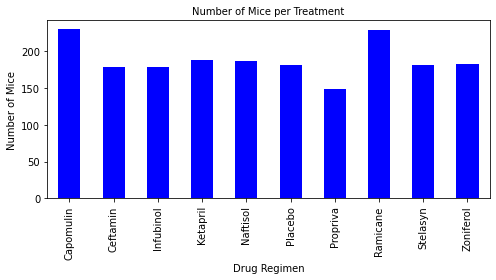

In [240]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_per_treatment = clean_combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 

# Configure plot and ticks
plot_pandas=mice_per_treatment.plot(kind="bar", facecolor="blue",figsize=(7,4))
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Mice per Treatment",fontsize = 10)
plt.tight_layout()
mice_per_treatment


Text(0, 0.5, 'Number of Mice')

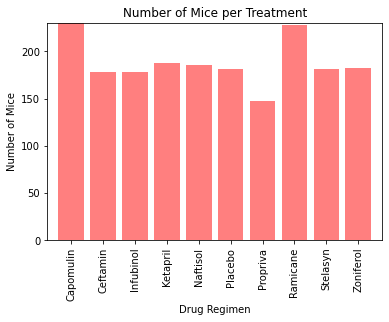

In [241]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Create an array that contains the number of mice each drug regimen has
treatment_per_mice =(clean_combined_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
x_axis = np.arange(len(treatment_per_mice))

# Configure plot and ticks
plt.bar(x_axis, treatment_per_mice, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(treatment_per_mice))

# Give our chart some labels and a tile
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create the dataframe with total count of Female and Male mice
gender_count= clean_combined_df.groupby(["Mouse ID","Sex"])
gender_count_df = pd.DataFrame(gender_count.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_count_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


(-1.1877230750926049,
 1.111197451260921,
 -1.1963304488776791,
 1.1123702248046798)

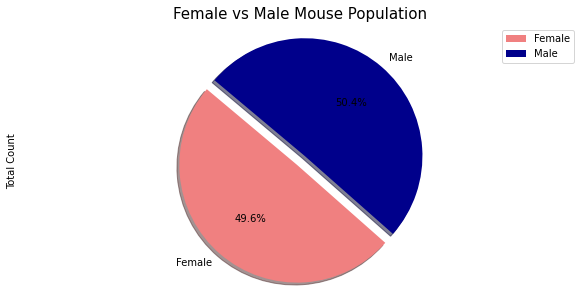

In [242]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]
# The colors of each section of the pie chart
colors = ["lightcoral" , "darkblue"]
# Explode tells matplotlib to seperate the "Female" section from the Male
explode = (0.1, 0)

plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,5), labels=labels, colors=colors, explode=explode, 
                             autopct="%1.1f%%", shadow = True, startangle=140)
plt.title('Female vs Male Mouse Population',fontsize = 15)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

(-1.1877230750926049,
 1.111197451260921,
 -1.1963304488776791,
 1.1123702248046798)

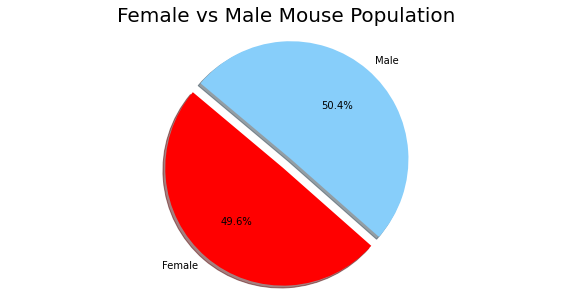

In [243]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for each sections of our pie chart
labels = ["Female","Male"]

# The values of each section of the pie chart
sizes = [49.596774,50.403226]

# The colors of each section of the pie chart
colors = ['red', 'lightskyblue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.subplots(figsize=(10, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Female vs Male Mouse Population',fontsize = 20)
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [219]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Capomulin
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [220]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Ramicane
Ramicane_df = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]

# Start by getting the last (greatest) timepoint for each mouse
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ramicane_merge = pd.merge(Ramicane_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [221]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Infubinol
Infubinol_df = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]

# Start by getting the last (greatest) timepoint for each mouse
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infubinol_merge = pd.merge(Infubinol_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [222]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Ceftamin
Ceftamin_df = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftamin_merge = pd.merge(Ceftamin_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [40]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin quartiles and IQR
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Capomulin quartiles and IQR")
print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"================================================")

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Ramicane quartiles and IQR
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Ramicane quartiles and IQR")
print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"================================================")

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Infubinol quartiles and IQR
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Infubinol quartiles and IQR")
print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"================================================")

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Ceftamin quartiles and IQR

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Ceftamin quartiles and IQR")
print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"================================================")

Capomulin quartiles and IQR
The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane quartiles and IQR
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol quartiles and IQR
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82

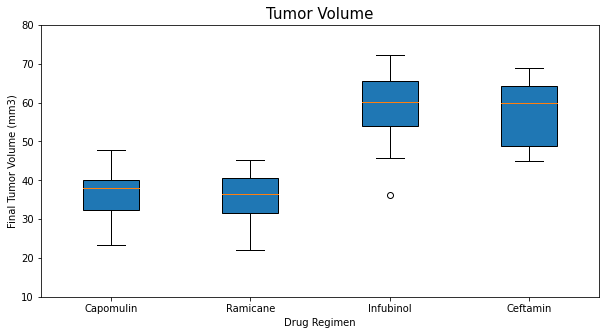

In [223]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Create empty list to fill with tumor vol data (for plotting)
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('Tumor Volume',fontsize =15)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [230]:
# Generate a Data Frame for a mouse treated with Capomulin
capomulin_line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
capomulin_line_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


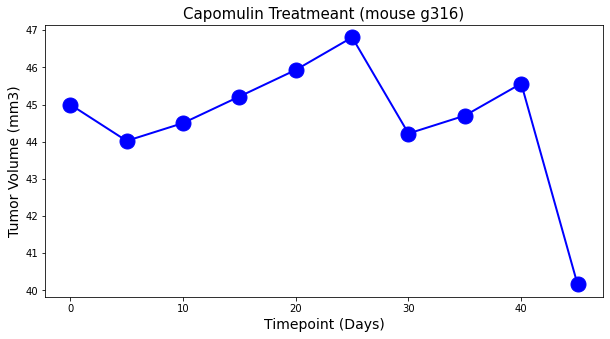

In [225]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = capomulin_line_df["Timepoint"]
tumsiz = capomulin_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Capomulin Treatmeant (mouse g316)',fontsize =15)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()

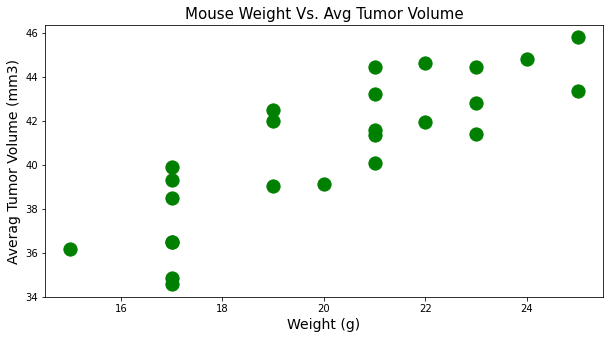

In [229]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 5))
avg_Capomulin =Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_Capomulin['Weight (g)'],avg_Capomulin['Tumor Volume (mm3)'],s=175, color="green")
plt.title('Mouse Weight Vs. Avg Tumor Volume',fontsize =15)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.show()


## Correlation and Regression

In [244]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_Capomulin['Weight (g)'],avg_Capomulin['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55
The r-squared is: 0.7088568047708717


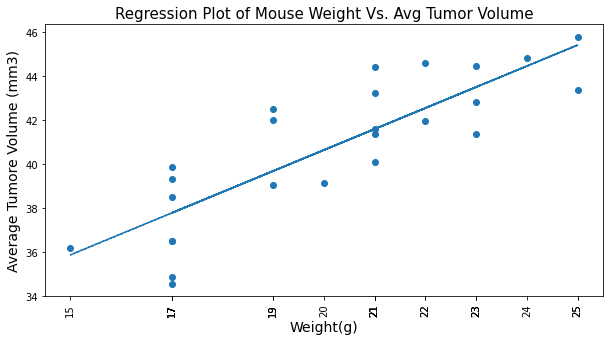

In [245]:
# Compare the calcualted Pearson's r to the plots
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x_values, y_values)
m_fit = m_slope * x_values +  m_int
print(f"slope:{m_slope}")
print(f"intercept:{m_int}")
print(f"rvalue (Correlation coefficient):{m_r}")
print(f"pandas (Correlation coefficient):{round(correlation[0],2)}")
print(f"stderr:{m_std_err}")
m_fit_eq = "y = " + str(round(m_slope,2)) + "x + " + str(round(m_int,2))
print(m_fit_eq)

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values, y_values)
plt.plot(x_values,m_fit,"--")
plt.xticks(x_values, rotation=90)
plt.title('Regression Plot of Mouse Weight Vs. Avg Tumor Volume',fontsize =15)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
print(f"The r-squared is: {m_r**2}")
plt.show()